# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'data/train.p'
validation_file = 'data/valid.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

# divide the examples based on its class
train_class = [[] for i in range(43)]
for i, y in enumerate(y_train):
    train_class[y].append(i)

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape

# TODO: How many unique classes/labels there are in the dataset.
import csv
n_classes = -1  # top row is not a class
signnames = {}
with open("signnames.csv") as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        n_classes += 1
        if row[0].isdigit():
            signnames[int(row[0])] = row[1]
print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (34799, 32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import NullFormatter
# Visualizations will be shown in the notebook.
%matplotlib inline

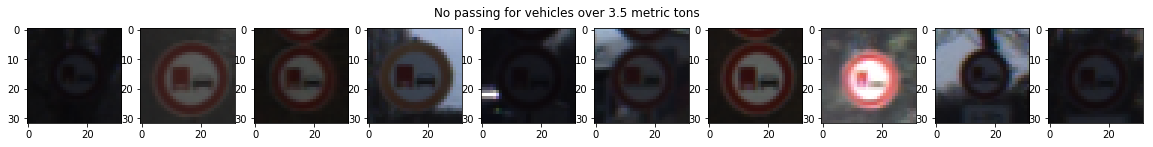

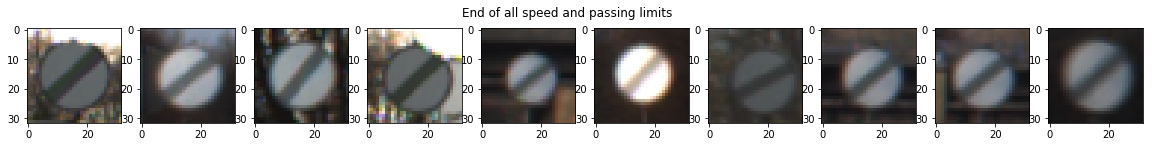

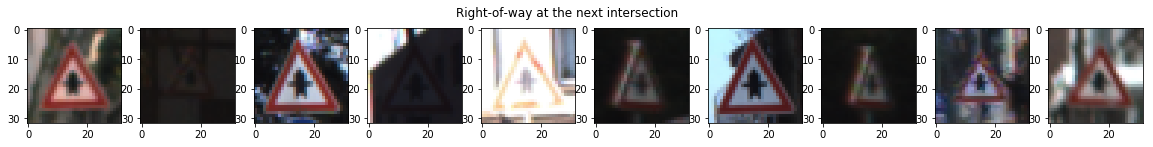

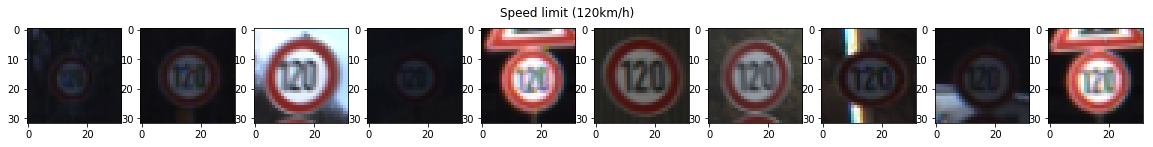

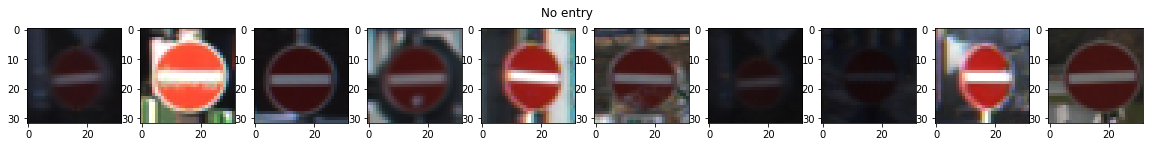

In [4]:
##############################
# Samples of training examples
##############################
import random

for i in random.sample(range(43), k=5):
    plt.figure(figsize=(20,2))
    plt.suptitle(signnames[i])
    for idx, n in enumerate(random.sample(range(len(train_class[i])), k=10)):
        plt.subplot(1, 10, idx+1)
        plt.imshow(X_train[train_class[i][n]])

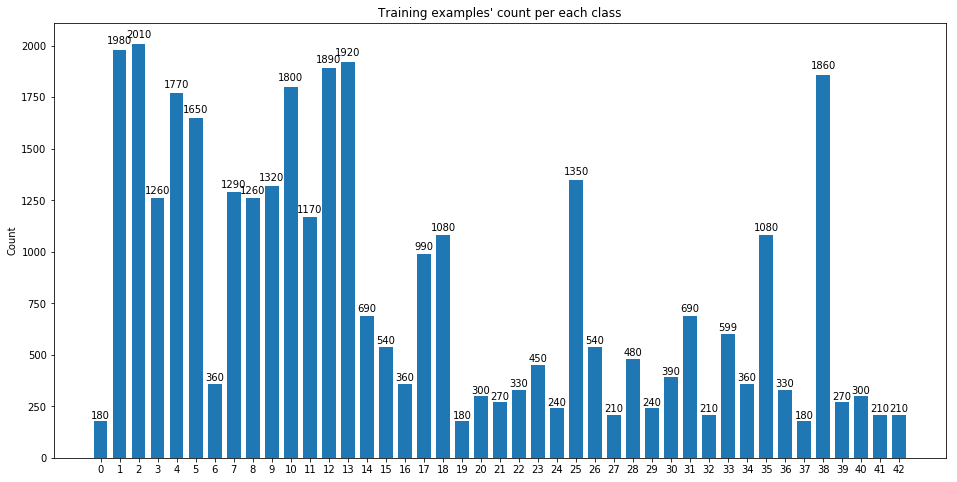

In [5]:
#####################
# Count of each class
#####################
count_per_class = [len(i) for i in train_class]
    
ind = np.arange(n_classes)  # the x locations for the groups
width = 0.7       # the width of the bars

fig, ax = plt.subplots(figsize=(16,8))
rects = ax.bar(ind, count_per_class, width)

# add some text for labels, title and axes ticks
ax.set_ylabel('Count')
ax.set_title('Training examples\' count per each class')
ax.set_xticks(ind)
ax.set_xticklabels(np.arange(n_classes))

# attach a text label above each bar displaying its height
for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
            '%d' % int(height),
            ha='center', va='bottom')

plt.show()

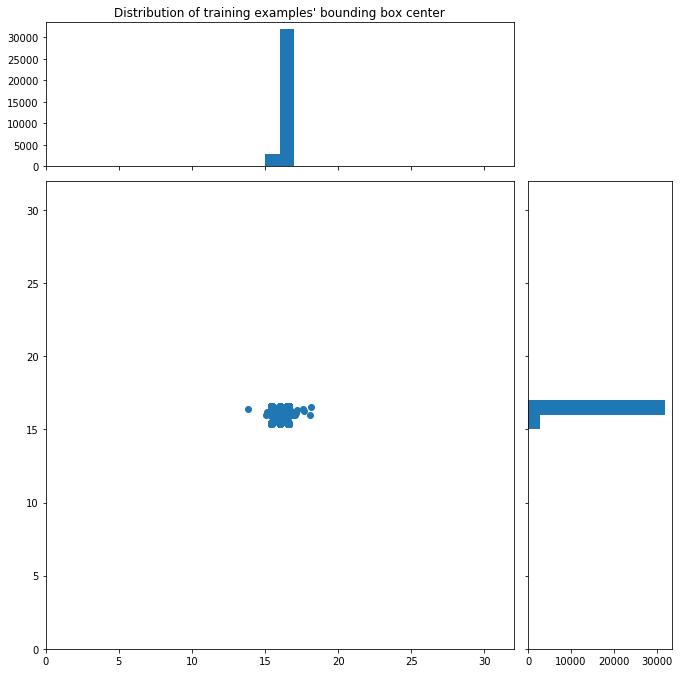

In [6]:
####################################
# Center of each class' bounding box
####################################
x = [None] * n_train
y = [None] * n_train
for i, bounding_box in enumerate(train['coords']):
    x[i] = ((bounding_box[0] + bounding_box[2]) / 2) * (32 / train['sizes'][i][0])
    y[i] = ((bounding_box[1] + bounding_box[3]) / 2) * (32 / train['sizes'][i][1])

nullfmt = NullFormatter()         # no labels

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(10, 10))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

# title
axHistx.set_title('Distribution of training examples\' bounding box center')

# the scatter plot:
axScatter.scatter(x, y)

# now determine nice limits by hand:
binwidth = 1
xymax = 32
lim = 32

axScatter.set_xlim((0, lim))
axScatter.set_ylim((0, lim))

bins = np.arange(0, lim + binwidth, binwidth)
axHistx.hist(x, bins=bins)
axHisty.hist(y, bins=bins, orientation='horizontal')

axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())

plt.show()

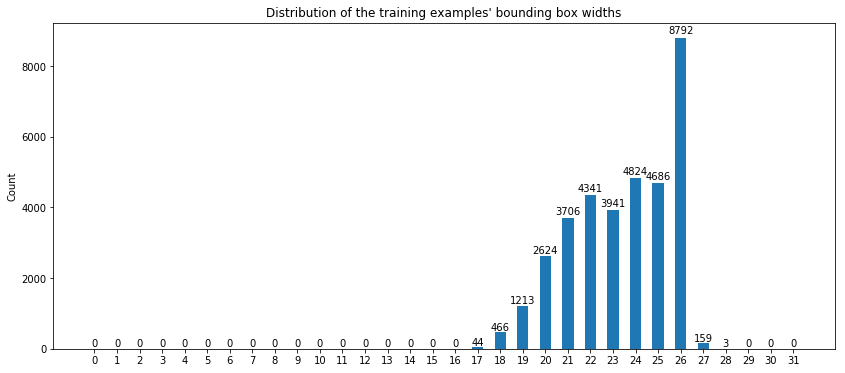

In [7]:
###############################################################
# Width of bounding box relative to width of the original image
###############################################################
train_widths = [0] * 32
for i, bounding_box in enumerate(train['coords']):
    train_widths[int((bounding_box[2] - bounding_box[0]) * (32 / train['sizes'][i][0]))] += 1
    
ind = np.arange(32)  # the x locations for the groups
width = 0.5       # the width of the bars

fig, ax = plt.subplots(figsize=(14,6))
rects = ax.bar(ind, train_widths, width)

# add some text for labels, title and axes ticks
ax.set_ylabel('Count')
ax.set_title('Distribution of the training examples\' bounding box widths')
ax.set_xticks(ind)
ax.set_xticklabels(np.arange(32))

# attach a text label above each bar displaying its height
for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
            '%d' % int(height),
            ha='center', va='bottom')

plt.show()

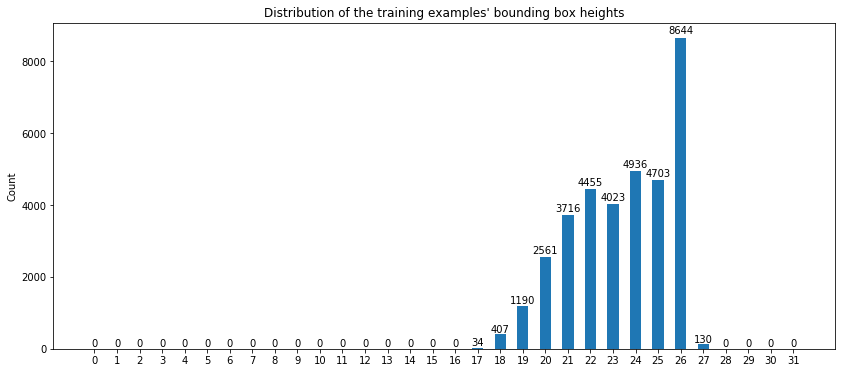

In [8]:
#################################################################
# Height of bounding box relative to height of the original image
#################################################################
train_heights = [0] * 32
for i, bounding_box in enumerate(train['coords']):
    train_heights[int((bounding_box[3] - bounding_box[1]) * (32 / train['sizes'][i][1]))] += 1
    
ind = np.arange(32)  # the x locations for the groups
width = 0.5       # the width of the bars

fig, ax = plt.subplots(figsize=(14,6))
rects = ax.bar(ind, train_heights, width)

# add some text for labels, title and axes ticks
ax.set_ylabel('Count')
ax.set_title('Distribution of the training examples\' bounding box heights')
ax.set_xticks(ind)
ax.set_xticklabels(np.arange(32))

# attach a text label above each bar displaying its height
for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
            '%d' % int(height),
            ha='center', va='bottom')

plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [1]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
from skimage import exposure
from joblib import Parallel, delayed

def preprocess_data(X):
    
    # Convert to grayscale (Y in YCbCr)
    X = 0.299 * X[:, :, :, 0] + 0.587 * X[:, :, :, 1] + 0.114 * X[:, :, :, 2]
    
    # CLAHE
    X = (X / 255.).astype(np.float32)
    X = np.asarray(Parallel(n_jobs=8)(delayed(exposure.equalize_adapthist)(X[i]) for i in range(X.shape[0])), dtype=np.float32)
    X = np.reshape(X, (X.shape[0], X.shape[1], X.shape[2], 1))

    # Normalization
    X = (X - 0.5) * 2
    
    return X

In [10]:
X_train = preprocess_data(X_train)
X_valid = preprocess_data(X_valid)
X_test = preprocess_data(X_test)

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint16
  .format(dtypeobj_in, dtypeobj_out))
/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint16
  .format(dtypeobj_in, dtypeobj_out))
/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint16
  .format(dtypeobj_in, dtypeobj_out))
/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint16
  .format(dtypeobj_in, dtypeobj_out))
/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint1

## Checkpoint

In [16]:
# Save the data for easy access
import os
pickle_file = 'preprocessed.pickle'
if not os.path.isfile(pickle_file):
    print('Saving data to pickle file...')
    try:
        with open(pickle_file, 'wb') as pfile:
            pickle.dump(
                {
                    'train_dataset': X_train,
                    'train_labels': y_train,
                    'valid_dataset': X_valid,
                    'valid_labels': y_valid,
                    'test_dataset': X_test,
                    'test_labels': y_test,
                },
                pfile, pickle.HIGHEST_PROTOCOL)
    except Exception as e:
        print('Unable to save data to', pickle_file, ':', e)
        raise

print('Data cached in pickle file.')

Saving data to pickle file...
Data cached in pickle file.


In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import random
from matplotlib.ticker import NullFormatter
# Visualizations will be shown in the notebook.
%matplotlib inline

# Reload the data
pickle_file = 'preprocessed.pickle'
with open(pickle_file, 'rb') as f:
  pickle_data = pickle.load(f)
  X_train = pickle_data['train_dataset']
  y_train = pickle_data['train_labels']
  X_valid = pickle_data['valid_dataset']
  y_valid = pickle_data['valid_labels']
  X_test = pickle_data['test_dataset']
  y_test = pickle_data['test_labels']
  del pickle_data  # Free up memory


print('Data and modules loaded.')

Data and modules loaded.


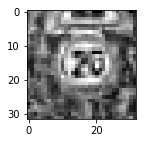

In [2]:
plt.figure(figsize=(2,2))
plt.imshow(X_train[10051].squeeze(), cmap='gray')
plt.show()

## Data Augmentation

### Flipping

In [3]:
# Flip horizontally to obtain data with the same class
flip_horizontal = [11, 12, 13, 15, 17, 18, 22, 26, 30, 35]
for y in flip_horizontal:
    flip_horizontal_data = X_train[y_train == y][:, :, ::-1, :]
    X_train = np.append(X_train, flip_horizontal_data, axis=0)
    y_train = np.append(y_train, [y] * flip_horizontal_data.shape[0], axis=0)

# Flip horizontally to obtain data with a different class
flip_horizontal_change_class = [(19, 20), (33, 34), (36, 37), (38, 39)]
for y1, y2 in flip_horizontal_change_class:
    flip_horizontal_change_class_data_y1 = X_train[y_train == y1][:, :, ::-1, :]
    flip_horizontal_change_class_data_y2 = X_train[y_train == y2][:, :, ::-1, :]
    X_train = np.append(X_train, flip_horizontal_change_class_data_y1, axis=0)
    y_train = np.append(y_train, [y2] * flip_horizontal_change_class_data_y1.shape[0], axis=0)
    X_train = np.append(X_train, flip_horizontal_change_class_data_y2, axis=0)
    y_train = np.append(y_train, [y1] * flip_horizontal_change_class_data_y2.shape[0], axis=0)

# Flip vertically to obtain data with the same class
flip_vertical = [1, 5, 12, 15, 17]
for y in flip_vertical:
    flip_vertical_data = X_train[y_train == y][:, ::-1, :, :]
    X_train = np.append(X_train, flip_vertical_data, axis=0)
    y_train = np.append(y_train, [y] * flip_vertical_data.shape[0], axis=0)

# Flip vertically and horizontally to obtain data with the same class
flip_horizontal_vertical = [32, 40]
for y in flip_horizontal_vertical:
    flip_horizontal_vertical_data = X_train[y_train == y][:, ::-1, ::-1, :]
    X_train = np.append(X_train, flip_horizontal_vertical_data, axis=0)
    y_train = np.append(y_train, [y] * flip_horizontal_vertical_data.shape[0], axis=0)

print("Number of training examples =", X_train.shape[0])
print("Number of training examples =", y_train.shape[0])
print("Image data shape =", X_train.shape)

Number of training examples = 59788
Number of training examples = 59788
Image data shape = (59788, 32, 32, 1)


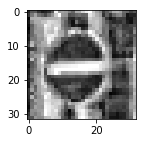

In [4]:
plt.figure(figsize=(2,2))
plt.imshow(X_train[41001].squeeze(), cmap='gray')
plt.show()

### Rotation

In [5]:
from skimage.transform import rotate
from joblib import Parallel, delayed

X_train_rotated = None

for n in range(4):
    X_train_rotated_parts = np.asarray(Parallel(n_jobs=8)(delayed(rotate)(X_train[i].squeeze(), random.uniform(-15, 15), mode = 'edge') for i in range(X_train.shape[0])), dtype=np.float32)
    if n == 0:
        X_train_rotated = X_train_rotated_parts
    else:
        X_train_rotated = np.append(X_train_rotated, X_train_rotated_parts, axis=0)
    print(n)


X_train_rotated = np.reshape(X_train_rotated, (X_train_rotated.shape[0], X_train_rotated.shape[1], X_train_rotated.shape[2], 1))
X_train = np.append(X_train, X_train_rotated, axis=0)
y_train = np.tile(y_train, 5)

0
1
2
3


In [6]:
print("Number of training examples =", X_train.shape[0])
print("Number of training examples =", y_train.shape[0])
print("Image data shape =", X_train.shape)

Number of training examples = 298940
Number of training examples = 298940
Image data shape = (298940, 32, 32, 1)


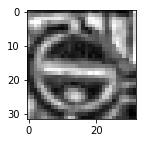

17


In [7]:
plt.figure(figsize=(2,2))
plt.imshow(X_train[280001].squeeze(), cmap='gray')
plt.show()
print(y_train[280001])

### Model Architecture

In [2]:
## Tunable hyperparameters
param_epochs = 50
param_batch_size = 128
param_learn_rate = 0.001

# Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
param_mean = 0
param_stddev = 0.1

# Dropout parameters
param_keep_prob = 0.5

# L2 regularization parameter
param_l2_beta = 0.01

# learn rate decay
#param_decay_rate = 0.96
#param_decay_step = 0.1

In [3]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return x

def maxpool2d(x, k=2):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding='SAME')

def fulcon(x, W, b):
    return tf.add(tf.matmul(x, W), b)

def CNN(x, keep_prob):
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 32x32x32.
    wc1 = tf.Variable(tf.truncated_normal([5, 5, 1, 32], mean=param_mean, stddev=param_stddev))
    bc1 = tf.Variable(tf.zeros([32]))
    conv_1 = conv2d(x, wc1, bc1)
    
    # Activation.
    conv_relu_1 = tf.nn.relu(conv_1)

    # Pooling. Input = 32x32x32. Output = 16x16x32.
    conv_relu_pool_1 = maxpool2d(conv_relu_1)

    # Layer 2: Convolutional. Input = 16x16x32. Output = 16x16x64.
    wc2 = tf.Variable(tf.truncated_normal([5, 5, 32, 64], mean=param_mean, stddev=param_stddev))
    bc2 = tf.Variable(tf.zeros([64]))
    conv_2 = conv2d(conv_relu_pool_1, wc2, bc2)
    
    # Activation.
    conv_relu_2 = tf.nn.relu(conv_2)

    # Pooling. Input = 16x16x64. Output = 8x8x64.
    conv_relu_pool_2 = maxpool2d(conv_relu_2)
    
    # Layer 3: Convolutional. Input = 8x8x64. Output = 8x8x128.
    wc3 = tf.Variable(tf.truncated_normal([5, 5, 64, 128], mean=param_mean, stddev=param_stddev))
    bc3 = tf.Variable(tf.zeros([128]))
    conv_3 = conv2d(conv_relu_pool_2, wc3, bc3)
    
    # Activation.
    conv_relu_3 = tf.nn.relu(conv_3)

    # Pooling. Input = 8x8x128. Output = 4x4x128.
    conv_relu_pool_3 = maxpool2d(conv_relu_3)

    # Concat and Flatten. Output = 3584.
    conv_relu_pool_1_pool = maxpool2d(conv_relu_pool_1, 4)
    conv_relu_pool_2_pool = maxpool2d(conv_relu_pool_2)
    flattened = tf.concat(1, [flatten(conv_relu_pool_1_pool), flatten(conv_relu_pool_2_pool), flatten(conv_relu_pool_3)])
    
    # Layer 4: Fully Connected. Input = 3584. Output = 1024.
    wfc4 = tf.Variable(tf.truncated_normal([3584, 1024], mean=param_mean, stddev=param_stddev), name='weights_fully_connected')
    bfc4 = tf.Variable(tf.zeros([1024]))
    fulcon_4 = fulcon(flattened, wfc4, bfc4)
    
    # Activation.
    fulcon_relu_4 = tf.nn.relu(fulcon_4)
    
    # Dropout
    fulcon_relu_dropout_4 = tf.nn.dropout(fulcon_relu_4, keep_prob)

    # Layer 5: Fully Connected. Input = 1024. Output = 43.
    wfc5 = tf.Variable(tf.truncated_normal([1024, 43], mean=param_mean, stddev=param_stddev))
    bfc5 = tf.Variable(tf.zeros([43]))
    logits = fulcon(fulcon_relu_dropout_4, wfc5, bfc5)
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [4]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [5]:
## Features and Labels
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32, ())

In [6]:
logits = CNN(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy) + (param_l2_beta * tf.nn.l2_loss(tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope="weights_fully_connected")))
optimizer = tf.train.AdamOptimizer(learning_rate = param_learn_rate)
training_operation = optimizer.minimize(loss_operation)

In [7]:
## Model Evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_ce = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, param_batch_size):
        batch_x, batch_y = X_data[offset:offset+param_batch_size], y_data[offset:offset+param_batch_size]
        accuracy, ce = sess.run([accuracy_operation, loss_operation], feed_dict={x: batch_x, y: batch_y, keep_prob: 1})
        total_accuracy += (accuracy * len(batch_x))
        total_ce += ce
    return (total_accuracy / num_examples, total_ce / (((num_examples - 1) // param_batch_size) + 1))

In [14]:
## Training
import math
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    last_cross_entropy = math.inf
    last_accuracy = 0
    
    print("Training...")
    print()
    for i in range(param_epochs):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, param_batch_size):
            end = offset + param_batch_size
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: param_keep_prob})
            
        training_accuracy, training_cross_entropy = evaluate(X_train, y_train)
        validation_accuracy, validation_cross_entropy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.4f}".format(training_accuracy))
        print("Training Cross Entropy =", training_cross_entropy)
        print("Validation Accuracy = {:.4f}".format(validation_accuracy))
        print("Validation Cross Entropy =", validation_cross_entropy)
        
        if (last_cross_entropy > validation_cross_entropy):
            last_cross_entropy = validation_cross_entropy
            saver.save(sess, './cross_entropy_model')
            print("Cross Entropy model saved")
        
        print()
        


Training...

EPOCH 1 ...
Training Accuracy = 0.9811
Training Cross Entropy = 0.253738099352
Validation Accuracy = 0.9490
Validation Cross Entropy = 0.378998833895
Accuracy model saved
Cross Entropy model saved

EPOCH 2 ...
Training Accuracy = 0.9881
Training Cross Entropy = 0.182439680045
Validation Accuracy = 0.9678
Validation Cross Entropy = 0.325205144286
Accuracy model saved
Cross Entropy model saved

EPOCH 3 ...
Training Accuracy = 0.9953
Training Cross Entropy = 0.130468251853
Validation Accuracy = 0.9778
Validation Cross Entropy = 0.231098474775
Accuracy model saved
Cross Entropy model saved

EPOCH 4 ...
Training Accuracy = 0.9971
Training Cross Entropy = 0.130278644197
Validation Accuracy = 0.9766
Validation Cross Entropy = 0.241471762529

EPOCH 5 ...
Training Accuracy = 0.9988
Training Cross Entropy = 0.0960925895057
Validation Accuracy = 0.9864
Validation Cross Entropy = 0.162091558746
Accuracy model saved
Cross Entropy model saved

EPOCH 6 ...
Training Accuracy = 0.9982
Trai

In [12]:
## Test the model

with tf.Session() as sess:
    saver.restore(sess, './cross_entropy_model')

    test_accuracy, _ = evaluate(X_test, y_test)
    print("Test Accuracy = {:.4f}".format(test_accuracy))

Test Accuracy = 0.9817


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [8]:
import csv
n_classes = -1  # top row is not a class
signnames = {}
with open("signnames.csv") as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        n_classes += 1
        if row[0].isdigit():
            signnames[int(row[0])] = row[1]

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint16
  .format(dtypeobj_in, dtypeobj_out))
/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint16
  .format(dtypeobj_in, dtypeobj_out))
/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint16
  .format(dtypeobj_in, dtypeobj_out))
/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint16
  .format(dtypeobj_in, dtypeobj_out))
/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint1

Speed limit (60km/h)


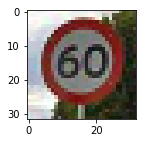

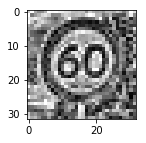

Right-of-way at the next intersection


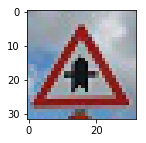

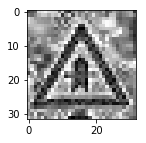

Priority road


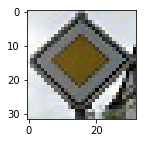

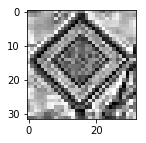

Yield


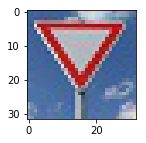

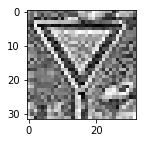

Road work


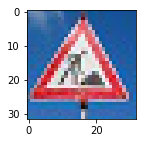

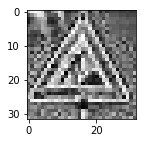

Children crossing


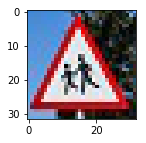

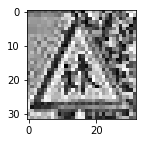

In [9]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
# Load images from .jpg files to `X_signs` NumPy array

import matplotlib.pyplot as plt
import numpy as np
# Visualizations will be shown in the notebook.
%matplotlib inline
from skimage import io
import os

X_signs = np.empty([0, 32, 32, 3], dtype = np.uint8)
y_signs = np.empty([0], dtype = np.int32)

image = io.imread(os.getcwd() + '/signs/3_.jpg')
X_signs = np.append(X_signs, [image[:, :, :3]], axis = 0)
y_signs = np.append(y_signs, 3)

image = io.imread(os.getcwd() + '/signs/11_.jpg')
X_signs = np.append(X_signs, [image[:, :, :3]], axis = 0)
y_signs = np.append(y_signs, 11)

image = io.imread(os.getcwd() + '/signs/12_.jpg')
X_signs = np.append(X_signs, [image[:, :, :3]], axis = 0)
y_signs = np.append(y_signs, 12)

image = io.imread(os.getcwd() + '/signs/13_.jpg')
X_signs = np.append(X_signs, [image[:, :, :3]], axis = 0)
y_signs = np.append(y_signs, 13)

image = io.imread(os.getcwd() + '/signs/25_.jpg')
X_signs = np.append(X_signs, [image[:, :, :3]], axis = 0)
y_signs = np.append(y_signs, 25)

image = io.imread(os.getcwd() + '/signs/28_.jpg')
X_signs = np.append(X_signs, [image[:, :, :3]], axis = 0)
y_signs = np.append(y_signs, 28)

X_signs_preprocessed = preprocess_data(X_signs)

for i in range(0, X_signs.shape[0]):
    print(signnames[y_signs[i]])
    plt.figure(figsize=(2,2))
    plt.imshow(X_signs[i])
    plt.show()
    plt.figure(figsize=(2,2))
    plt.imshow(X_signs_preprocessed[i].squeeze(), cmap='gray')
    plt.show()

### Predict the Sign Type for Each Image

Actual class: Speed limit (60km/h)
Prediction: Speed limit (60km/h)


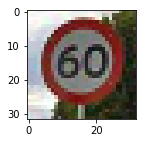

Actual class: Right-of-way at the next intersection
Prediction: Right-of-way at the next intersection


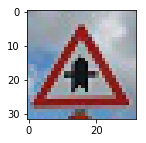

Actual class: Priority road
Prediction: Priority road


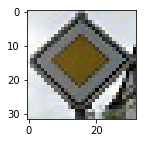

Actual class: Yield
Prediction: Yield


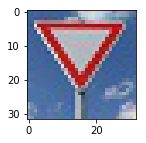

Actual class: Road work
Prediction: Road work


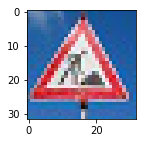

Actual class: Children crossing
Prediction: Children crossing


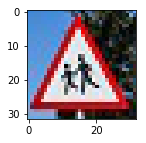

In [24]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
import tensorflow as tf
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, './cross_entropy_model')
    predictions, top_probabilities = sess.run([tf.argmax(logits, 1), tf.nn.top_k(tf.nn.softmax(logits), k=5)], feed_dict={x: X_signs_preprocessed, keep_prob: 1})
    for i in range(0, X_signs_preprocessed.shape[0]):
        print('Actual class: ' + signnames[y_signs[i]])
        print('Prediction: ' + signnames[predictions[i]])
        plt.figure(figsize=(2,2))
        plt.imshow(X_signs[i])
        plt.show()

### Analyze Performance

In [21]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
num_correct = 0
for i in range(0, predictions.shape[0]):
    if (predictions[i] == y_signs[i]):
        num_correct += 1
print('Accuracy = {:.2f}%'.format(100 * num_correct / predictions.shape[0]))

Accuracy = 100.00%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

Actual class: Speed limit (60km/h)
Prediction: Speed limit (60km/h)
Top probabilities:
    Speed limit (60km/h): 98.03%
    Speed limit (50km/h): 1.97%
    Speed limit (80km/h): 0.00%
    Priority road: 0.00%
    Stop: 0.00%


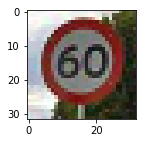

Actual class: Right-of-way at the next intersection
Prediction: Right-of-way at the next intersection
Top probabilities:
    Right-of-way at the next intersection: 100.00%
    Beware of ice/snow: 0.00%
    Double curve: 0.00%
    End of no passing by vehicles over 3.5 metric tons: 0.00%
    Pedestrians: 0.00%


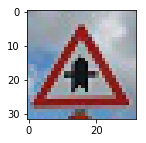

Actual class: Priority road
Prediction: Priority road
Top probabilities:
    Priority road: 100.00%
    Road work: 0.00%
    No vehicles: 0.00%
    End of all speed and passing limits: 0.00%
    Yield: 0.00%


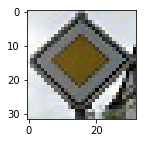

Actual class: Yield
Prediction: Yield
Top probabilities:
    Yield: 100.00%
    General caution: 0.00%
    Stop: 0.00%
    End of all speed and passing limits: 0.00%
    Roundabout mandatory: 0.00%


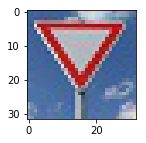

Actual class: Road work
Prediction: Road work
Top probabilities:
    Road work: 100.00%
    Bicycles crossing: 0.00%
    Turn right ahead: 0.00%
    Beware of ice/snow: 0.00%
    Road narrows on the right: 0.00%


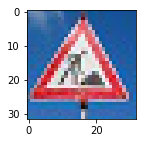

Actual class: Children crossing
Prediction: Children crossing
Top probabilities:
    Children crossing: 95.47%
    Beware of ice/snow: 1.93%
    Road work: 1.39%
    Dangerous curve to the right: 0.75%
    Speed limit (60km/h): 0.24%


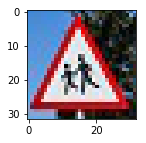

In [32]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
for i in range(0, predictions.shape[0]):
    print('Actual class: ' + signnames[y_signs[i]])
    print('Prediction: ' + signnames[predictions[i]])
    print('Top probabilities:')
    for idx in range(0, top_probabilities[0][0].shape[0]):
        print('    ' + signnames[top_probabilities[1][i][idx].astype(int)] + ': {:.2f}%'.format(100 * top_probabilities[0][i][idx]))
    plt.figure(figsize=(2,2))
    plt.imshow(X_signs[i])
    plt.show()

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")